In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

# Dataset

In [2]:
df = pd.read_csv(
    'cansim-0800020-eng-6674700030567901031.csv',
    skiprows=6, skipfooter=9, engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


### Adjust date

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


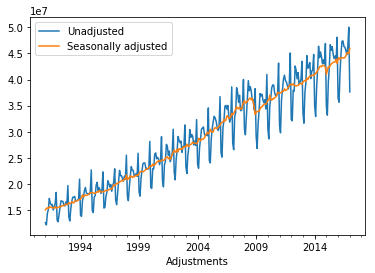

In [3]:
from pandas.tseries.offsets import MonthEnd

df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')

display(df.head())
display(df.plot())

### Split train-testset

In [4]:
split_date = pd.Timestamp('01-01-2011')

train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

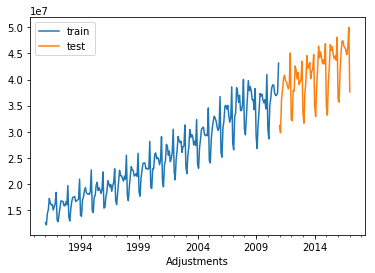

In [5]:
ax = train.plot();
test.plot(ax=ax)
plt.legend(['train', 'test']);

#### MinMax Scaling input 

In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

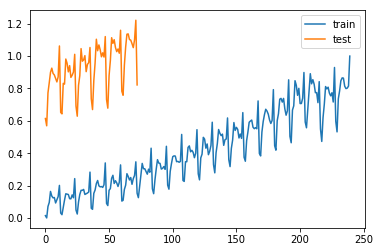

In [7]:
ax = pd.DataFrame(train_sc).plot();
pd.DataFrame(test_sc).plot(ax=ax)
plt.legend(['train', 'test']);

#### Create Sliding Windows

In [8]:
train_sc_df = pd.DataFrame(train_sc, columns=['MinMax_Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['MinMax_Scaled'], index=test.index)

train_sc_df.head()

,MinMax_Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [9]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['MinMax_Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['MinMax_Scaled'].shift(s)
    
train_sc_df.head(13)

,MinMax_Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


#### Define train-testset 

In [10]:
X_train = train_sc_df.dropna().drop('MinMax_Scaled', axis=1)
y_train = train_sc_df.dropna()[['MinMax_Scaled']]

X_test = test_sc_df.dropna().drop('MinMax_Scaled', axis=1)
y_test = test_sc_df.dropna()[['MinMax_Scaled']]

display(X_train.head())
display(y_train.head())

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


,MinMax_Scaled
Adjustments,
1992-01-31,0.030027
1992-02-29,0.019993
1992-03-31,0.065964
1992-04-30,0.109831
1992-05-31,0.149130


In [11]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(228, 12)
(228, 1)

(61, 12)
(61, 1)


## Exercise 1

In the model above we reshaped the input shape to: `(num_samples, 1, 12)`, i.e. we treated a window of 12 months as a vector of 12 coordinates that we simultaneously passed to all the LSTM nodes. An alternative way to look at the problem is to reshape the input to `(num_samples, 12, 1)`. This means we consider each input window as a sequence of 12 values that we will pass in sequence to the LSTM. In principle this looks like a more accurate description of our situation. But does it yield better predictions? Let's check it.

- Reshape `X_train` and `X_test` so that they represent a set of univariate sequences
- retrain the same LSTM(6) model, you'll have to adapt the `input_shape`
- check the performance of this new model, is it better at predicting the test data?

In [12]:
# Convert to tensor: (num_samples, 12, 1)
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print(X_train_t.shape)
print(X_test_t.shape)

(228, 12, 1)
(61, 12, 1)


In [13]:
from keras.models import Sequential
import keras.backend as K
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

K.clear_session()

model = Sequential()

model.add(LSTM(6, input_shape=(12, 1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

In [15]:
history = model.fit(
    X_train_t, y_train,
    epochs=100, batch_size=1, verbose=0,
    validation_split=0.25,
    callbacks=[early_stop])

Epoch 00042: early stopping


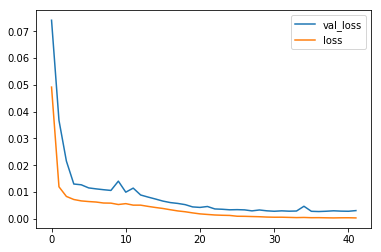

In [16]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

#### Evaluate

In [17]:
y_train_pred = model.predict(X_train_t)
y_test_pred = model.predict(X_test_t)

In [18]:
from sklearn.metrics import mean_squared_error as mse

print("The Mean Squared Error on the Train set is:\t{:0.5f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.5f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	0.00105
The Mean Squared Error on the Test set is:	0.00167


In [19]:
from sklearn.metrics import r2_score

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.981
The R2 score on the Test set is:	0.920


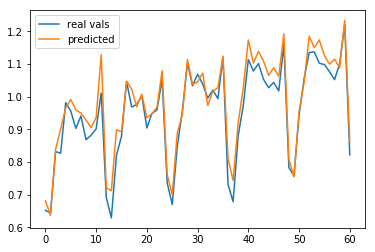

In [20]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.legend(['real vals', 'predicted']);

## => The models are extremely good

## Exercise 2

RNN models can be applied to images too. In general we can apply them to any data where there's a connnection between nearby units. Let's see how we can easily build a model that works with images.

- Load the MNIST data, by now you should be able to do it blindfolded :)
- reshape it so that an image looks like a long sequence of pixels
- create a recurrent model and train it on the training data
- how does it perform compared to a fully connected? How does it compare to Convolutional Neural Networks?

(feel free to run this exercise on a cloud GPU if it's too slow on your laptop)

#### Load dataset

In [21]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')


print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)

(10000, 28, 28)
(10000,)


5


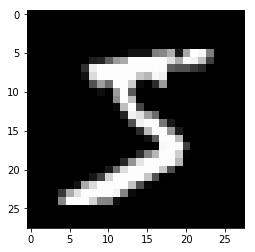

In [22]:
plt.imshow(X_train[0], cmap='gray');
print(y_train[0])

#### Feature Engineering X

In [23]:
# Normalize X
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert to tensor
X_train = X_train.reshape(X_train.shape[0], -1, 1)
X_test = X_test.reshape(X_test.shape[0], -1, 1)

print(X_train.shape)
print(X_test.shape)

(60000, 784, 1)
(10000, 784, 1)


#### One hot encoding y

In [24]:
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat.shape)
print(y_test_cat.shape)

(60000, 10)
(10000, 10)


#### Model

In [25]:
from keras.models import Sequential
import keras.backend as K
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

K.clear_session()

model = Sequential()

model.add(LSTM(32, input_shape=(784, 1))) # LSTM
model.add(Dense(10, activation='softmax')) # Classification Outputs

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 4,682
Trainable params: 4,682
Non-trainable params: 0
_________________________________________________________________


In [26]:
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

In [ ]:
history = model.fit(
    X_train, y_train_cat,
    epochs=100, batch_size=32, verbose=1,
    validation_split=0.25, shuffle=True,
    callbacks=[early_stop])

#### Evaluate

In [ ]:
result = model.evaluate(X_test, y_test_cat)

display(result)
print('Accuracy: ' + str(result[1]*100.0) + ' %')